# Import Library


In [1]:
# Import the ususal library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy


import random
import warnings
warnings.filterwarnings('ignore')

# Read CSV File dari Google Drive

https://docs.google.com/spreadsheets/d/<SPREADSHEET_ID>/export?format=csv&gid=<SHEET_ID>

In [2]:
# read file from gdrive (ubah id dengan id pada link gdrive)
sheet1 = 'https://docs.google.com/spreadsheets/d/125wOLCfAG7JpCB0Byj8zdOD80VfUECbf/export?format=csv&gid=705711167'
df_penjualan = pd.read_csv(sheet1)

sheet2 = 'https://docs.google.com/spreadsheets/d/125wOLCfAG7JpCB0Byj8zdOD80VfUECbf/export?format=csv&gid=1777977425'
df_pelanggan = pd.read_csv(sheet2)

sheet3 = 'https://docs.google.com/spreadsheets/d/125wOLCfAG7JpCB0Byj8zdOD80VfUECbf/export?format=csv&gid=460749532'
df_produk = pd.read_csv(sheet3)

# Cek Info DF

In [3]:
df_penjualan.info()
df_pelanggan.info()
df_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no_bon          8862 non-null   object
 1   id_pelanggan    8864 non-null   object
 2   tanggal_bon     9016 non-null   object
 3   kota            8872 non-null   object
 4   id_produk       8868 non-null   object
 5   jumlah_terjual  9022 non-null   int64 
 6   diskon          9022 non-null   int64 
 7   rating          9022 non-null   int64 
 8   Komplain        9022 non-null   object
dtypes: int64(3), object(6)
memory usage: 634.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_pelanggan    2000 non-null   object
 1   nama_pelanggan  2000 non-null   object
 2   gender          2000 non-null   object
 3   tanggal_lahir   2000 non-nu

# Join 3 DF Menjadi 1 DF

1. Cek Kolom semua DF
2. Pilih kolom yang sama antar DF agar bisa di join:

- df_penjualan(id_pelanggan) = df_pelanggan(id_pelanggan)

- df_penjualan(id_produk) = df_produk(id_produk)    

In [4]:
# join df_penjualan(id_pelanggan) = df_pelanggan(id_pelanggan)
df_join1 = df_penjualan.merge(df_pelanggan, on='id_pelanggan', how='left')

In [5]:
# df_penjualan(id_produk) = df_produk(id_produk)
df = df_join1.merge(df_produk, on='id_produk', how='left')

# Data Overview (After Join)

In [6]:
# Cek Tipe Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_bon          8862 non-null   object 
 1   id_pelanggan    8864 non-null   object 
 2   tanggal_bon     9016 non-null   object 
 3   kota            8872 non-null   object 
 4   id_produk       8868 non-null   object 
 5   jumlah_terjual  9022 non-null   int64  
 6   diskon          9022 non-null   int64  
 7   rating          9022 non-null   int64  
 8   Komplain        9022 non-null   object 
 9   nama_pelanggan  8864 non-null   object 
 10  gender          8864 non-null   object 
 11  tanggal_lahir   8864 non-null   object 
 12  jenis_barang    8868 non-null   object 
 13  merek_barang    8868 non-null   object 
 14  harga_satuan    8868 non-null   float64
 15  modal           8868 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 1.1+ MB


,jumlah_terjual,diskon,rating,harga_satuan,modal
count,9022.000000,9022.000000,9022.000000,8.868000e+03,8.868000e+03
mean,23.528486,8.737530,3.007648,4.195732e+06,3.265205e+06
std,14.499851,7.110312,1.426407,6.596441e+06,5.240445e+06
min,10.000000,0.000000,1.000000,1.250000e+05,8.760300e+04
25%,15.000000,5.000000,2.000000,7.500000e+05,5.736180e+05
50%,21.000000,10.000000,3.000000,1.800000e+06,1.139107e+06
75%,27.000000,15.000000,4.000000,2.700000e+06,1.828761e+06
max,100.000000,25.000000,5.000000,2.900000e+07,2.531300e+07


# Copy Dataset (Backup)

In [7]:
df_cp = df.copy()

# Cleaning

## Cek Missing Value

In [8]:
# Cek Missing
df_cp.isnull().sum()

no_bon            160
id_pelanggan      158
tanggal_bon         6
kota              150
id_produk         154
jumlah_terjual      0
diskon              0
rating              0
Komplain            0
nama_pelanggan    158
gender            158
tanggal_lahir     158
jenis_barang      154
merek_barang      154
harga_satuan      154
modal             154
dtype: int64

In [9]:
# Cek Presentase Missing
df_cp.isnull().sum() / len(df) * 100

no_bon            1.773443
id_pelanggan      1.751275
tanggal_bon       0.066504
kota              1.662603
id_produk         1.706939
jumlah_terjual    0.000000
diskon            0.000000
rating            0.000000
Komplain          0.000000
nama_pelanggan    1.751275
gender            1.751275
tanggal_lahir     1.751275
jenis_barang      1.706939
merek_barang      1.706939
harga_satuan      1.706939
modal             1.706939
dtype: float64

**Insight:**
- Proporsi missing value sangat kecil (<2%)
- Kolom seperti ID & tanggal bon kosong → Data ini tidak akan berguna untuk analisis transaksi (misalnya agregasi penjualan per bon/tanggal/pelanggan)
- Analisis yang akan dilakukan butuh data utuh per transaksi
- Mengisi missing value dengan metode imputation malah berisiko menambah bias karena bukan data yang bisa "ditebak" secara random atau rata-rata.

In [10]:
# Cek apakah missing value 154 itu satu baris:
hilang_154 = df_cp[
    df_cp[['id_produk', 'jenis_barang', 'merek_barang', 'harga_satuan', 'modal']].isnull().all(axis=1)
]

hilang_154.shape  # Cek berapa baris

(154, 16)

In [11]:
# Drop semua missing value
df_clean = df_cp.dropna(
    subset=[
        'no_bon', 'id_pelanggan', 'tanggal_bon', 'kota',
        'id_produk', 'jenis_barang', 'merek_barang',
        'harga_satuan', 'modal',
        'nama_pelanggan', 'gender', 'tanggal_lahir'
    ]
).reset_index(drop=True)

**Insight:**
- Analisis customer behavior
- Agregasi 
- Repeat order
- Purchase pattern

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8409 entries, 0 to 8408
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_bon          8409 non-null   object 
 1   id_pelanggan    8409 non-null   object 
 2   tanggal_bon     8409 non-null   object 
 3   kota            8409 non-null   object 
 4   id_produk       8409 non-null   object 
 5   jumlah_terjual  8409 non-null   int64  
 6   diskon          8409 non-null   int64  
 7   rating          8409 non-null   int64  
 8   Komplain        8409 non-null   object 
 9   nama_pelanggan  8409 non-null   object 
 10  gender          8409 non-null   object 
 11  tanggal_lahir   8409 non-null   object 
 12  jenis_barang    8409 non-null   object 
 13  merek_barang    8409 non-null   object 
 14  harga_satuan    8409 non-null   float64
 15  modal           8409 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 1.0+ MB


## Cek Duplikat

In [13]:
# Cek duplikasi berdasarkan keseluruhan kolom
df_clean.duplicated().sum()

np.int64(1)

In [14]:
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

In [15]:
# Cek duplikasi berdasarkan no bon
df_clean['no_bon'].duplicated().sum()

np.int64(7)

In [16]:
duplikat_nobon = df_clean[df_clean['no_bon'].duplicated(keep=False)]

In [17]:
duplikat_nobon.sort_values(by='no_bon')

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal
4620,BON01812,PEL01815,6/11/2023,Depok,PRD00020,29,15,4,no,Agus CXV,L,12/8/1975,Keyboard,Samsung,600000.0,501505.0
4628,BON01812,PEL01815,6/11/2023,Depok,PRD00020,29,15,1,yes,Agus CXV,L,12/8/1975,Keyboard,Samsung,600000.0,501505.0
1592,BON01818,PEL00792,10/27/2021,Bogor,PRD00025,13,0,1,yes,Budi WQS,L,6/24/1983,Keyboard,Panasonic,400000.0,287728.0
1597,BON01818,PEL00792,10/27/2021,Bogor,PRD00025,13,0,5,no,Budi WQS,L,6/24/1983,Keyboard,Panasonic,400000.0,287728.0
2087,BON03432,PEL01771,2/3/2022,Bandung,PRD00025,17,15,3,no,Tina EVC,P,10/14/1984,Keyboard,Panasonic,400000.0,287728.0
2092,BON03432,PEL01771,2/3/2022,Bandung,PRD00025,17,15,2,no,Tina EVC,P,10/14/1984,Keyboard,Panasonic,400000.0,287728.0
1902,BON04188,PEL01506,12/25/2021,Jakarta,PRD00029,77,25,3,no,Agus WFE,L,4/13/1994,Printer,Brother,900000.0,607976.0
1905,BON04188,PEL01506,12/25/2021,Jakarta,PRD00029,77,25,2,no,Agus WFE,L,4/13/1994,Printer,Brother,900000.0,607976.0
6706,BON04253,PEL01943,7/19/2024,Jakarta,PRD00067,27,0,4,no,Lia JIZ,P,6/4/1999,PC Rakitan,MJ013,24000000.0,20554678.0
6708,BON04253,PEL01943,7/19/2024,Jakarta,PRD00067,27,0,1,yes,Lia JIZ,P,6/4/1999,PC Rakitan,MJ013,24000000.0,20554678.0


In [18]:
# Gabung data dupliat dan ambil rating terakhir
df_clean = df_clean.sort_index().drop_duplicates(subset=['no_bon', 'id_produk'], keep='last').reset_index(drop=True)

**Insight:**
- Akurasi data 
- Menghindari bias 

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_bon          8401 non-null   object 
 1   id_pelanggan    8401 non-null   object 
 2   tanggal_bon     8401 non-null   object 
 3   kota            8401 non-null   object 
 4   id_produk       8401 non-null   object 
 5   jumlah_terjual  8401 non-null   int64  
 6   diskon          8401 non-null   int64  
 7   rating          8401 non-null   int64  
 8   Komplain        8401 non-null   object 
 9   nama_pelanggan  8401 non-null   object 
 10  gender          8401 non-null   object 
 11  tanggal_lahir   8401 non-null   object 
 12  jenis_barang    8401 non-null   object 
 13  merek_barang    8401 non-null   object 
 14  harga_satuan    8401 non-null   float64
 15  modal           8401 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 1.0+ MB


## Konversi kolom tanggal ke datetime

In [20]:
df_clean['tanggal_bon'] = pd.to_datetime(df_clean['tanggal_bon'])
df_clean['tanggal_lahir'] = pd.to_datetime(df_clean['tanggal_lahir'])

**Insight:**
- Melakukan perhitungan umur
- Filter data berdasarkan rentang waktu 
- Grouping by bulan/tahun/minggu
- Visualisasi time series

## Feature Engineering

In [21]:
# Hitung Umur Pelanggan
df_clean['umur'] = (pd.Timestamp('today') - df_clean['tanggal_lahir']).dt.days // 365

In [22]:
# Total Nilai Penjualan per Transaksi (Setelah Diskon)
df_clean['total_penjualan'] = (df_clean['harga_satuan'] * df_clean['jumlah_terjual']) * (1 - df_clean['diskon'] / 100)

In [23]:
# Laba Kotor per Transaksi
df_clean['laba_kotor'] = (df_clean['harga_satuan'] - df_clean['modal']) * df_clean['jumlah_terjual']

In [24]:
# Margin (%)
df_clean['margin'] = ((df_clean['harga_satuan'] - df_clean['modal']) / df_clean['harga_satuan']) * 100

# Analisis Data

In [25]:
# Basic data overview
df_clean.shape

(8401, 20)

In [26]:
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   no_bon           8401 non-null   object        
 1   id_pelanggan     8401 non-null   object        
 2   tanggal_bon      8401 non-null   datetime64[ns]
 3   kota             8401 non-null   object        
 4   id_produk        8401 non-null   object        
 5   jumlah_terjual   8401 non-null   int64         
 6   diskon           8401 non-null   int64         
 7   rating           8401 non-null   int64         
 8   Komplain         8401 non-null   object        
 9   nama_pelanggan   8401 non-null   object        
 10  gender           8401 non-null   object        
 11  tanggal_lahir    8401 non-null   datetime64[ns]
 12  jenis_barang     8401 non-null   object        
 13  merek_barang     8401 non-null   object        
 14  harga_satuan     8401 non-null   float64

,tanggal_bon,jumlah_terjual,diskon,rating,tanggal_lahir,harga_satuan,modal,umur,total_penjualan,laba_kotor,margin
count,8401,8401.000000,8401.000000,8401.000000,8401,8.401000e+03,8.401000e+03,8401.000000,8.401000e+03,8.401000e+03,8401.000000
mean,2023-03-24 05:10:45.780264192,23.508035,8.743007,3.005714,1985-06-08 02:50:33.067491968,4.216537e+06,3.281900e+06,39.670992,8.559064e+07,2.118610e+07,23.899243
min,2021-01-01 00:00:00,10.000000,0.000000,1.000000,1965-01-08 00:00:00,1.250000e+05,8.760300e+04,19.000000,1.062500e+06,1.757700e+05,10.592941
25%,2022-02-05 00:00:00,15.000000,5.000000,2.000000,1975-05-20 00:00:00,7.500000e+05,5.736180e+05,30.000000,1.350000e+07,3.211344e+06,16.284973
50%,2023-03-21 00:00:00,21.000000,10.000000,3.000000,1985-02-28 00:00:00,1.800000e+06,1.139107e+06,40.000000,2.808000e+07,7.027891e+06,23.719684
75%,2024-05-06 00:00:00,27.000000,15.000000,4.000000,1995-05-08 00:00:00,2.700000e+06,1.828761e+06,50.000000,6.156000e+07,1.967736e+07,30.639778
max,2025-06-28 00:00:00,100.000000,25.000000,5.000000,2005-12-21 00:00:00,2.900000e+07,2.531300e+07,60.000000,2.044500e+09,6.590838e+08,39.612421
std,NaN,14.522125,7.101946,1.424268,NaN,6.621511e+06,5.259714e+06,11.776574,1.504210e+08,3.954627e+07,8.337798


## Numerikal

### Jumlah Terjual

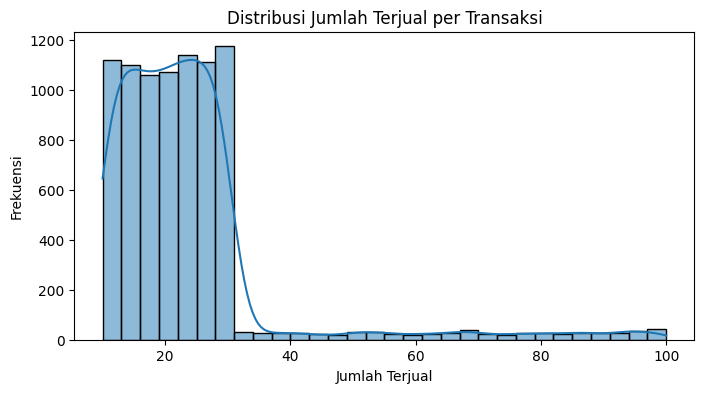

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['jumlah_terjual'], bins=30, kde=True)
plt.title('Distribusi Jumlah Terjual per Transaksi')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Right skew
- 
- 

### Diskon

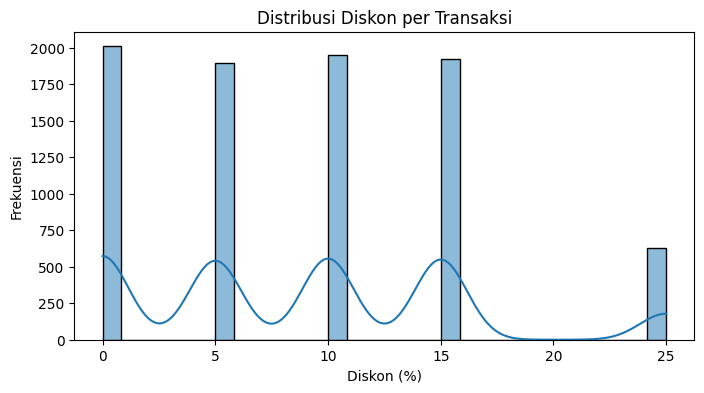

In [28]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['diskon'], bins=30, kde=True)
plt.title('Distribusi Diskon per Transaksi')
plt.xlabel('Diskon (%)')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Right skew
- 
- 

### Rating

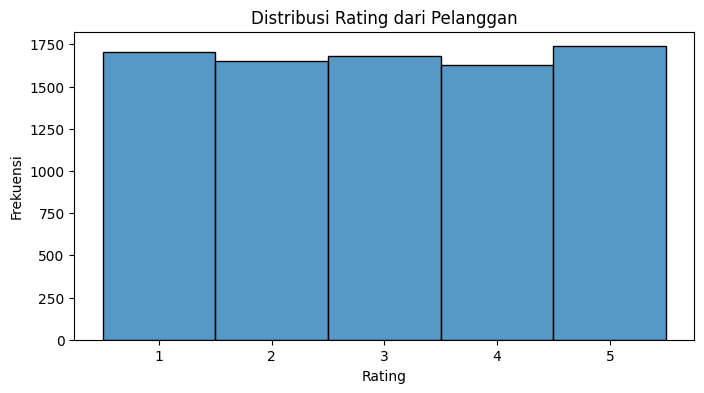

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['rating'], bins=5, discrete=True)
plt.title('Distribusi Rating dari Pelanggan')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Right skew
- 
- 

### Harga Satuan

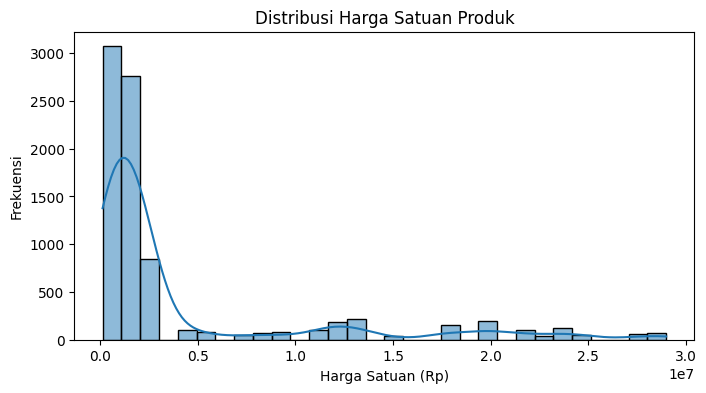

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['harga_satuan'], bins=30, kde=True)
plt.title('Distribusi Harga Satuan Produk')
plt.xlabel('Harga Satuan (Rp)')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Right skew
- 
- 

### Modal

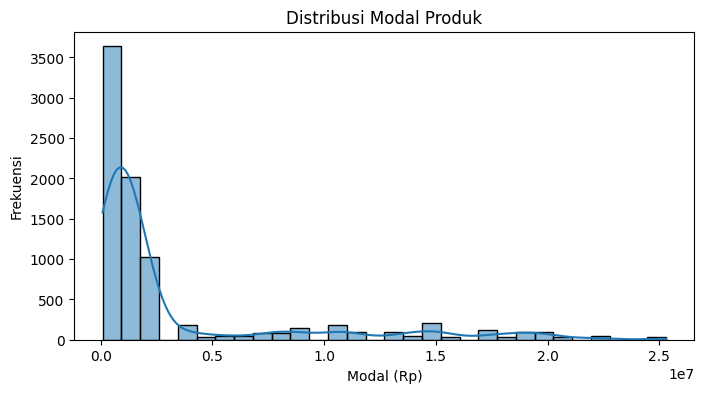

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['modal'], bins=30, kde=True)
plt.title('Distribusi Modal Produk')
plt.xlabel('Modal (Rp)')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Right skew
- 
- 

### Umur

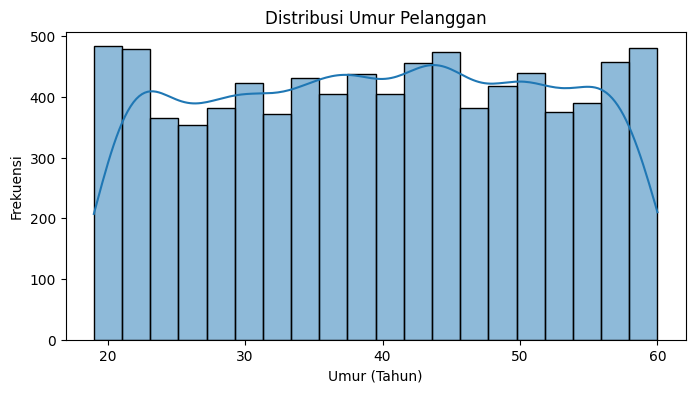

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['umur'], bins=20, kde=True)
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Right skew
- 
- 

### Total Penjualan

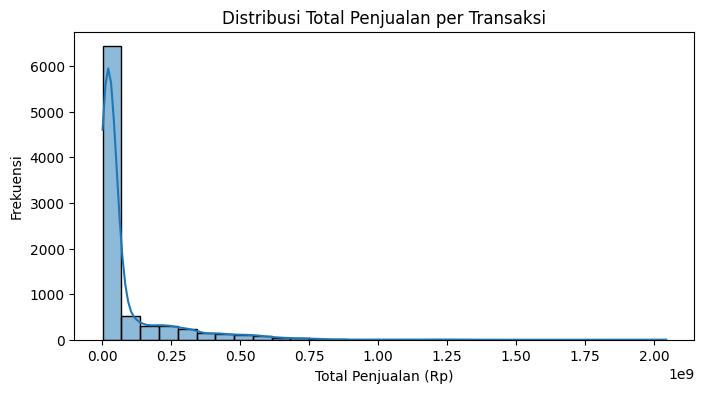

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['total_penjualan'], bins=30, kde=True)
plt.title('Distribusi Total Penjualan per Transaksi')
plt.xlabel('Total Penjualan (Rp)')
plt.ylabel('Frekuensi')
plt.show()

### Laba Kotor

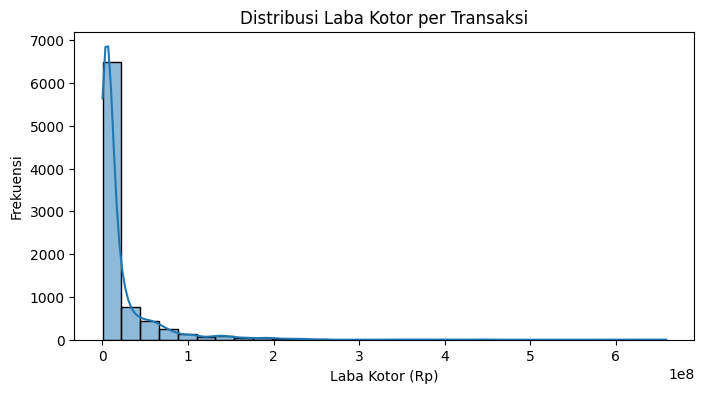

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['laba_kotor'], bins=30, kde=True)
plt.title('Distribusi Laba Kotor per Transaksi')
plt.xlabel('Laba Kotor (Rp)')
plt.ylabel('Frekuensi')
plt.show()

### Margin

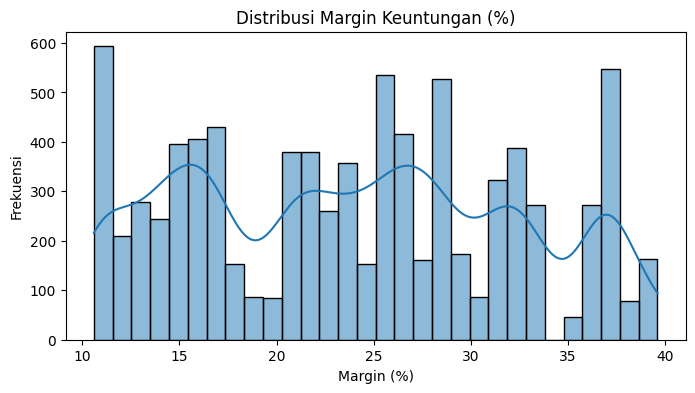

In [35]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['margin'], bins=30, kde=True)
plt.title('Distribusi Margin Keuntungan (%)')
plt.xlabel('Margin (%)')
plt.ylabel('Frekuensi')
plt.show()

## Kategorikal

### Kota

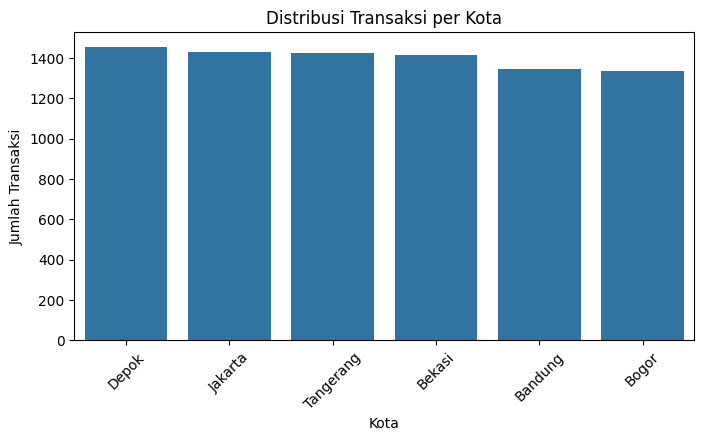

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_clean, x='kota', order=df_clean['kota'].value_counts().index)
plt.title('Distribusi Transaksi per Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Gender

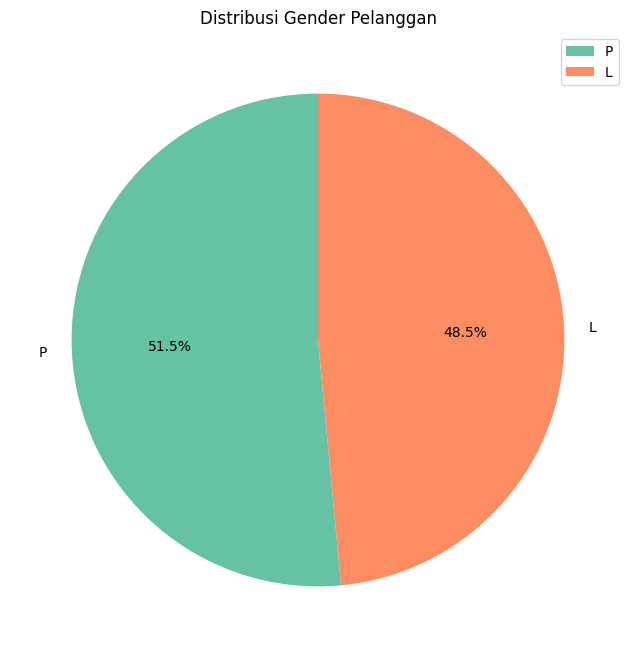

In [42]:
plt.figure(figsize=(8,8))
plt.pie(df_clean['gender'].value_counts(),
        labels=df_clean['gender'].value_counts().index,
        colors=plt.cm.Set2.colors[:df_clean['gender'].nunique()],
        autopct='%1.1f%%', startangle=90)

plt.title('Distribusi Gender Pelanggan')
plt.legend(loc='upper right')
plt.show()

### Jenis Barang

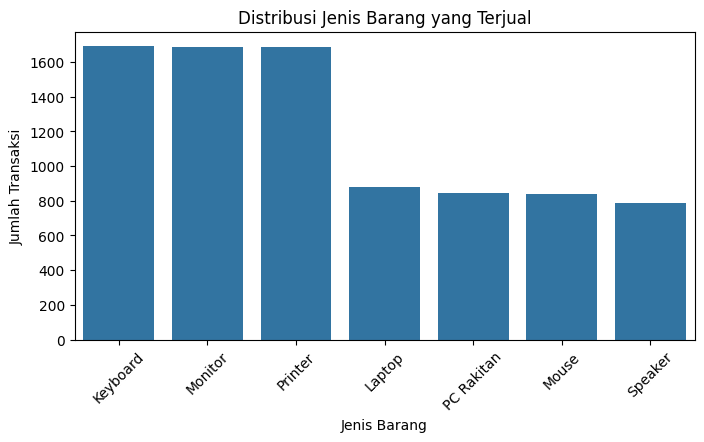

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_clean, x='jenis_barang', order=df_clean['jenis_barang'].value_counts().index)
plt.title('Distribusi Jenis Barang yang Terjual')
plt.xlabel('Jenis Barang')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Merek Barang

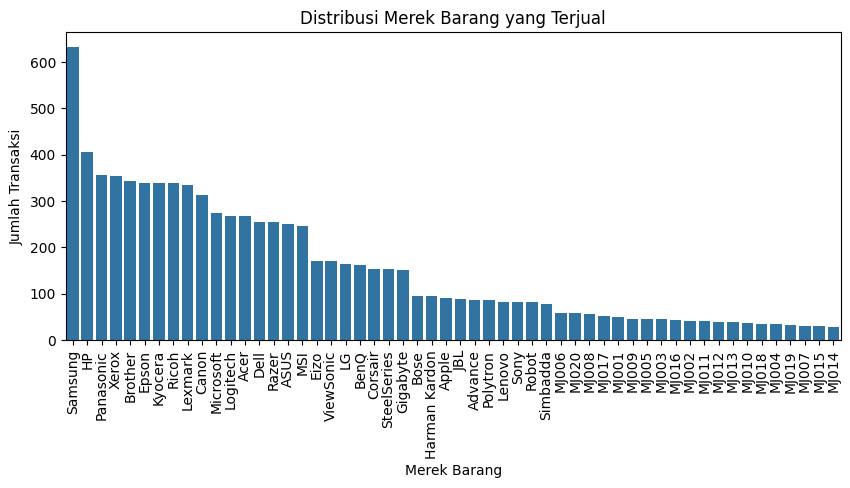

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_clean, x='merek_barang', order=df_clean['merek_barang'].value_counts().index)
plt.title('Distribusi Merek Barang yang Terjual')
plt.xlabel('Merek Barang')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=90)
plt.show()

### Komplain

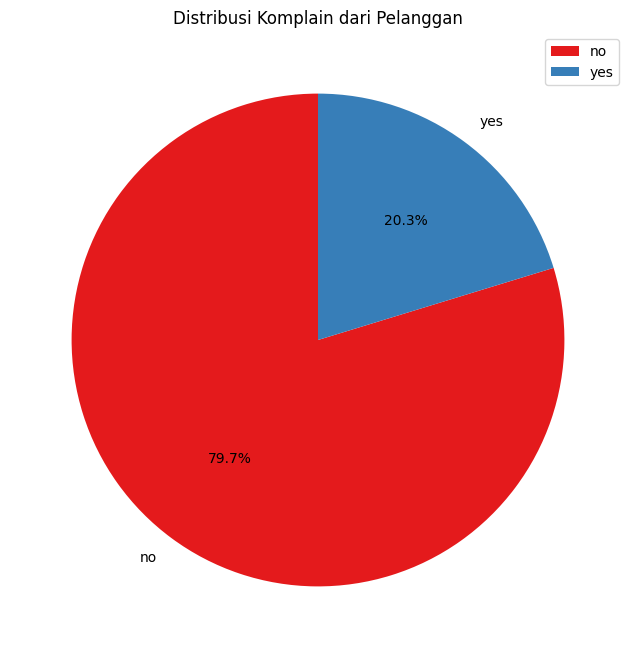

In [41]:
plt.figure(figsize=(8,8))
plt.pie(df_clean['Komplain'].value_counts(),
        labels=df_clean['Komplain'].value_counts().index,
        colors=plt.cm.Set1.colors[:df_clean['Komplain'].nunique()],
        autopct='%1.1f%%', startangle=90)

plt.title('Distribusi Komplain dari Pelanggan')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# 1. Pastikan tipe data tanggal sudah benar (kode Anda sudah benar)
df_cp['tanggal_bon'] = pd.to_datetime(df_cp['tanggal_bon'], errors='coerce')

# 2. Hapus baris di mana tanggal_bon tidak valid setelah konversi
df_cp.dropna(subset=['tanggal_bon'], inplace=True)

# 3. Hitung transaksi per bulan & URUTKAN SECARA KRONOLOGIS
#    Langkah ini adalah inti perbaikannya
transaksi_bulanan = df_cp['tanggal_bon'].dt.to_period('M').value_counts().sort_index()

# 4. Buat visualisasi dari data yang sudah terurut dengan benar
plt.figure(figsize=(12, 6))
plot = sns.barplot(
    x=transaksi_bulanan.index.astype(str),  # Sumbu X diambil dari index (misal: '2023-01')
    y=transaksi_bulanan.values,             # Sumbu Y adalah jumlah transaksinya
    palette='viridis'
)

plt.title('Jumlah Transaksi per Bulan', fontsize=16)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotasi label agar tidak tumpang tindih
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Otomatis menyesuaikan ukuran plot
plt.show()


In [ ]:
# Ubah ke Datetime
df_cp['tanggal_bon'] = pd.to_datetime(df_cp['tanggal_bon'], errors='coerce')
df_cp['tanggal_lahir'] = pd.to_datetime(df_cp['tanggal_lahir'], errors='coerce')